# **Project Name**    - Uber Supply Demand Gap Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name** - Abhijna S Rao

# **Project Summary -**

This project analyzes Uber ride request data to uncover patterns and identify the supply-demand gap at different times of the day and at various pickup points (Airport vs City). Using extensive EDA techniques, we reveal imbalances in trip availability and propose recommendations to reduce rider dissatisfaction and optimize driver deployment.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**

During peak hours, many Uber users are unable to get rides either due to cancellations or the unavailability of cabs. This leads to loss of potential revenue and poor customer experience. The primary problem is to understand when and where the demand-supply mismatch occurs and recommend actionable strategies to Uber to bridge this gap.

**Write Problem Statement Here.**

#### **Define Your Business Objective?**

The business objective is to:

- Analyze trip request data to identify key supply-demand gap trends.

- Pinpoint peak hours and locations with maximum shortfall.

- Provide recommendations that Uber can implement to improve supply availability, optimize driver distribution, and maximize completed rides.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
# Load Dataset
df_uber = pd.read_csv("Uber Request Data.csv")

### Dataset First View

In [3]:
# Dataset First Look
df_uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("Number of Rows in titles =",df_uber.shape[0])
print("Number of Columns in titles =",df_uber.shape[1])

Number of Rows in titles = 6745
Number of Columns in titles = 6


### Dataset Information

In [5]:
# Dataset Info
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
df_uber['Request timestamp']=pd.to_datetime(df_uber['Request timestamp'])
df_uber['Drop timestamp']=pd.to_datetime(df_uber['Drop timestamp'])

In [7]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print("Number of duplicate values in titles dataset=",df_uber.duplicated().sum())

Number of duplicate values in titles dataset= 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print("Number of missing values in titles=",df_uber.isna().sum().sum())

Number of missing values in titles= 6564


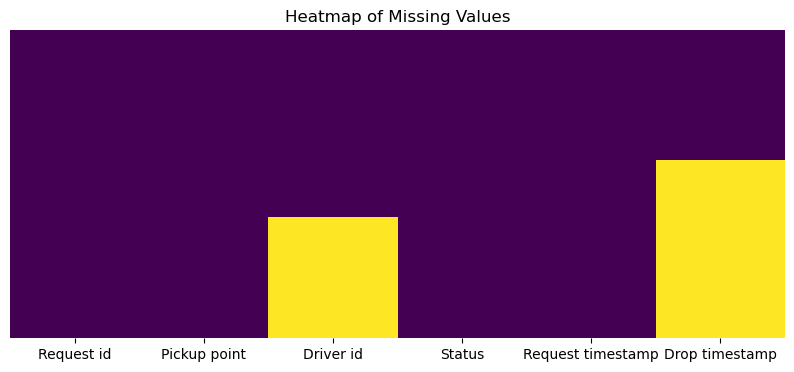

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df_uber.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [11]:
df_uber[df_uber['Drop timestamp'].isnull()].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

'Drop timestamp' is empty when the status of the trip is either cancelled or no cars are available.
This is a valid reason for null values as the trips did not occur

In [12]:
df_uber[df_uber['Driver id'].isnull()].groupby('Status').size()

Status
No Cars Available    2650
dtype: int64

The driver id is null as there is no car available. Hence, there are no missing values in the data. 
The null values are valid

### What did you know about your dataset?

- The dataset contains ride requests from two key pickup points – City and Airport.

- Each request has timestamps, status (Trip Completed / Cancelled / No Cars Available), and other attributes.

- Missing values are valid (e.g., no drop time when the trip didn't happen).

- Strong temporal patterns exist – requests spike during office hours and night.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df_uber.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [14]:
# Dataset Describe
df_uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Variables Description

- Request timestamp & Drop timestamp: Show the request and completion time.

- Pickup point: Location – either City or Airport.

- Status: Outcome of the request – Trip Completed, Cancelled, or No Cars Available.

- Driver id: Assigned only when a trip is confirmed.

- Derived features like hour, day, and time slots were created for more granular analysis.


### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for col in df_uber.columns:
    print(f" No.of unique value in {col}: {df_uber[col].nunique()}")

 No.of unique value in Request id: 6745
 No.of unique value in Pickup point: 2
 No.of unique value in Driver id: 300
 No.of unique value in Status: 3
 No.of unique value in Request timestamp: 5618
 No.of unique value in Drop timestamp: 2598


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
trip_time_label = ["Late night", "Early morning","Late morning", "Afternoon","Evening", "Night"]
trip_time = [1,4,8,12,16,20,24]

In [17]:
df_uber["Request date"] = df_uber["Request timestamp"].dt.date
df_uber["Request hour"] = df_uber["Request timestamp"].dt.hour
df_uber["Request day"] = df_uber["Request timestamp"].dt.day_name()
df_uber['Request hour timeslot'] = pd.cut(df_uber['Request hour'], trip_time, labels =trip_time_label)

In [18]:
df_uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request day,Request hour timeslot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11,Monday,Late morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,9,Wednesday,Late morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21,Wednesday,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,Early morning


In [19]:
df_uber["Drop date"] = df_uber["Drop timestamp"].dt.date
df_uber["Drop hour"] = df_uber["Drop timestamp"].dt.hour
df_uber["Drop day"] = df_uber["Drop timestamp"].dt.day_name()
df_uber['Drop hour timeslot'] = pd.cut(df_uber['Drop hour'], trip_time, labels =trip_time_label)

In [20]:
df_uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request day,Request hour timeslot,Drop date,Drop hour,Drop day,Drop hour timeslot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11,Monday,Late morning,2016-11-07,13.0,Monday,Afternoon
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17,Monday,Evening,2016-11-07,18.0,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,9,Wednesday,Late morning,2016-12-07,9.0,Wednesday,Late morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21,Wednesday,Night,2016-12-07,22.0,Wednesday,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,Early morning,2016-07-13,9.0,Wednesday,Late morning


In [21]:
df_uber.to_csv('Cleaned Uber data.csv',sep=',',index=False)

### What all manipulations have you done and insights you found?

Manipulations Done:

- Converted timestamps to datetime format.

- Extracted day, hour, and custom time slots (morning, afternoon, etc.).

- Split data into City vs Airport subsets.

- Created supply-demand-gap datasets per hour and timeslot.

- copied the uber data to cleaned uber data for furthuer analysis.

Insights Found:

- Cancellation is high in the City during morning office hours.

- No cars available dominates at the Airport during evening hours.

- Supply is stable, but demand spikes are not met.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

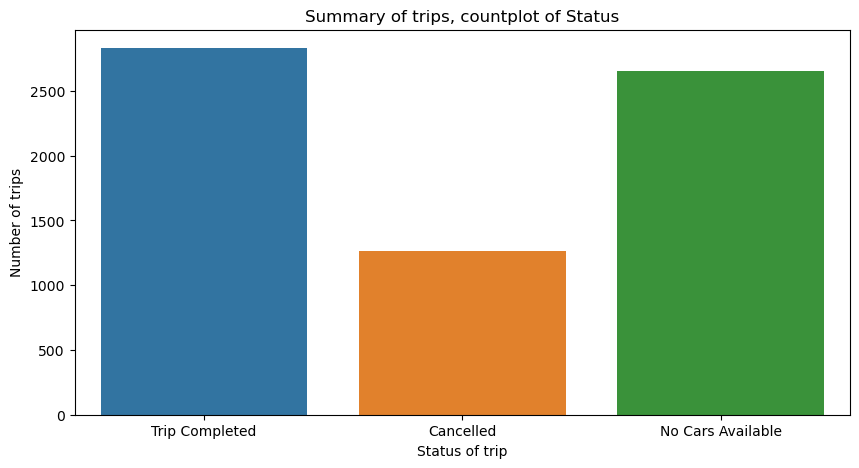

In [22]:
# Chart - 1 visualization code

# Univariate analysis for the 'Status' column
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_uber, x='Status')
plt.title("Summary of trips, countplot of Status")
plt.xlabel("Status of trip")
plt.ylabel("Number of trips")
plt.show()


##### 1. Why did you pick the specific chart?

 To understand the distribution of trip outcomes.

##### 2. What is/are the insight(s) found from the chart?

A significant number of trips are either cancelled or unfulfilled.

##### 3. Will the gained insights help creating a positive business impact?

 Lost revenue and poor customer satisfaction.

#### Chart - 2

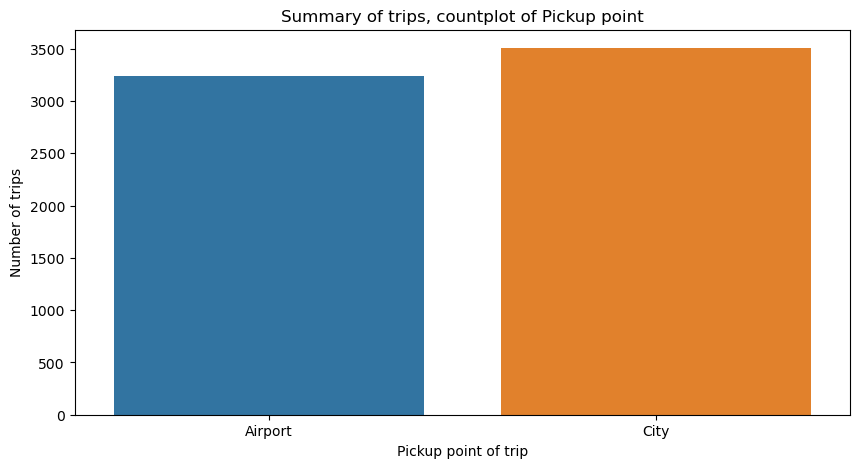

In [23]:
# Chart - 2 visualization code

# Univariate analysis for the 'Pickup point' column
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_uber, x='Pickup point')
plt.title("Summary of trips, countplot of Pickup point")
plt.xlabel("Pickup point of trip")
plt.ylabel("Number of trips")
plt.show()


##### 1. Why did you pick the specific chart?

Visualize demand throughout the day.

##### 2. What is/are the insight(s) found from the chart?

Morning and evening hours show peak demand.

##### 3. Will the gained insights help creating a positive business impact?
Uber needs more drivers during these slots.

#### Chart - 3

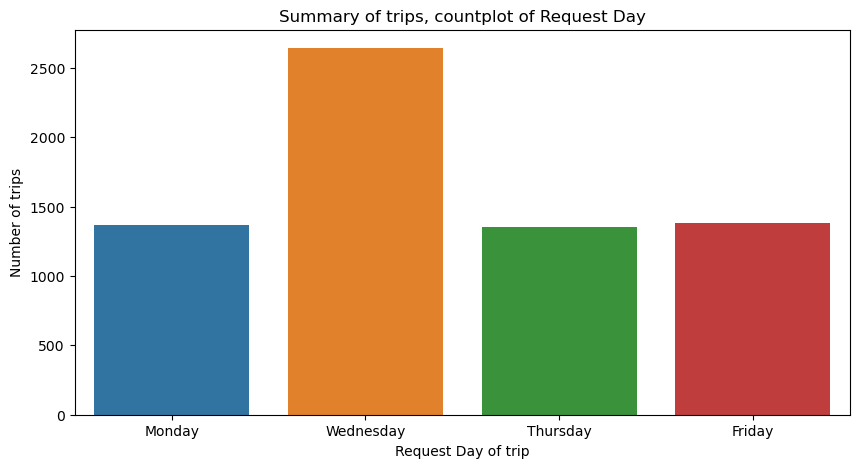

In [24]:
# Chart - 3 visualization code

# Univariate analysis for the 'Pickup point' column
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_uber, x='Request day')
plt.title("Summary of trips, countplot of Request Day")
plt.xlabel("Request Day of trip")
plt.ylabel("Number of trips")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

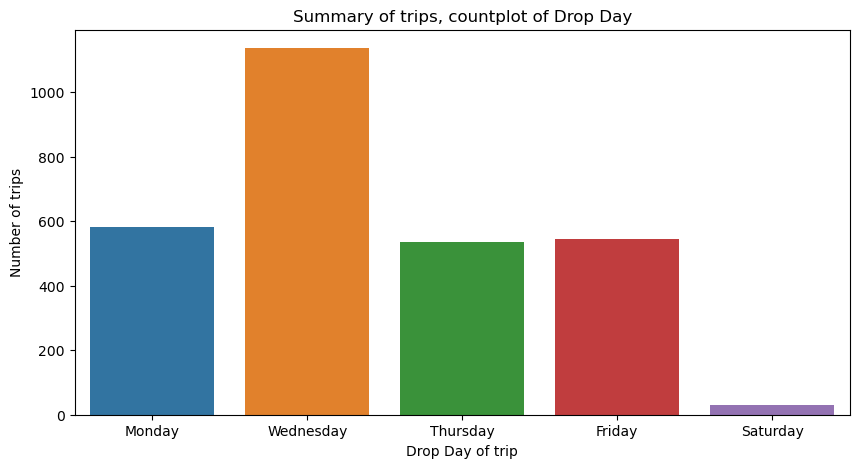

In [25]:
# Chart - 4 visualization code

# Univariate analysis for the 'Pickup point' column
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_uber, x='Drop day')
plt.title("Summary of trips, countplot of Drop Day")
plt.xlabel("Drop Day of trip")
plt.ylabel("Number of trips")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

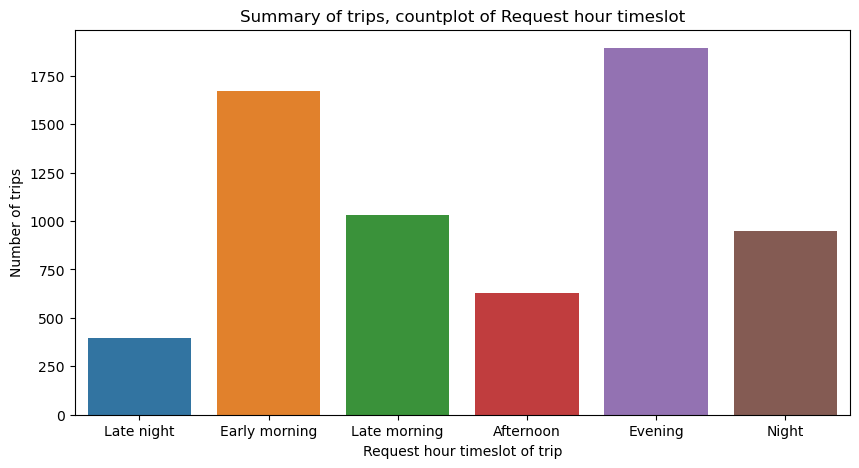

In [26]:
# Chart - 5 visualization code

# Univariate analysis for the 'Pickup point' column
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_uber, x='Request hour timeslot')
plt.title("Summary of trips, countplot of Request hour timeslot")
plt.xlabel("Request hour timeslot of trip")
plt.ylabel("Number of trips")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

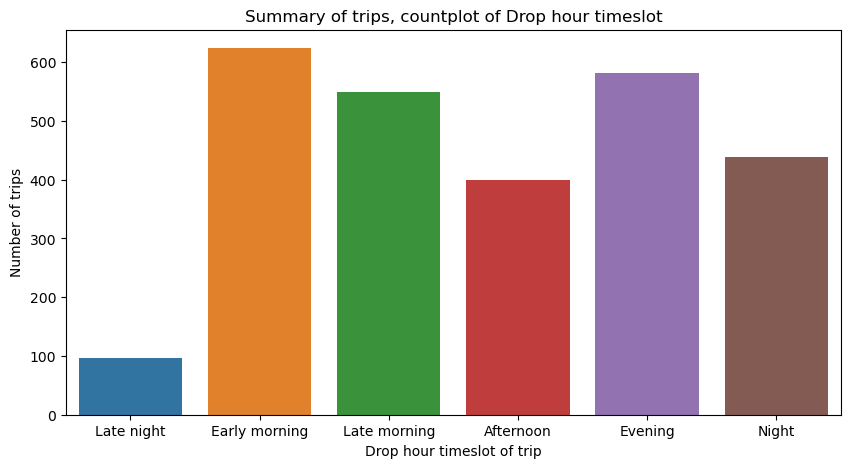

In [27]:
# Chart - 6 visualization code

# Univariate analysis for the 'Pickup point' column
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_uber, x='Drop hour timeslot')
plt.title("Summary of trips, countplot of Drop hour timeslot")
plt.xlabel("Drop hour timeslot of trip")
plt.ylabel("Number of trips")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

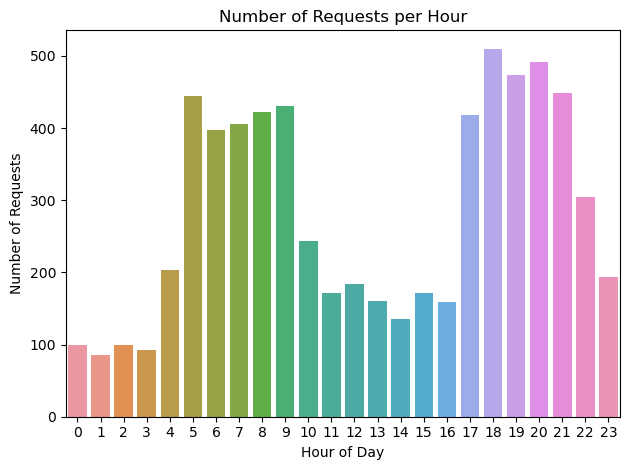

In [28]:
# Chart - 7 visualization code

# Univariate analysis for the 'Request hour' column
plt.figure()
sns.countplot(data=df_uber, x='Request hour', order=sorted(df_uber['Request hour'].dropna().unique()))
plt.title("Number of Requests per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Bivariate Analysis

#### Chart - 8

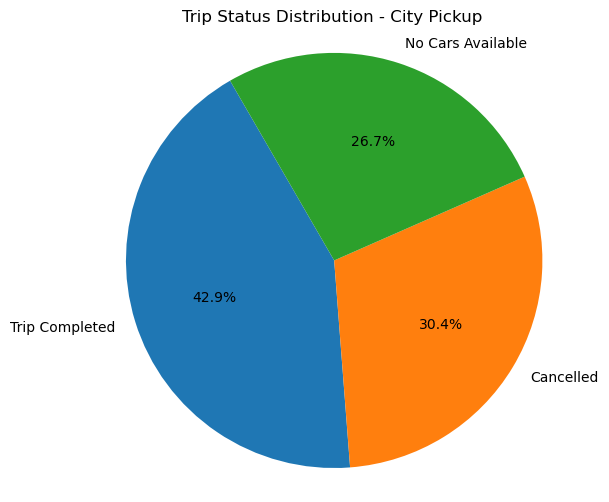

In [29]:
# Chart - 8 visualization code

# Pie chart for 'City' pickup point
city_data = df_uber[df_uber['Pickup point'] == 'City']
status_counts_city = city_data['Status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(status_counts_city, labels=status_counts_city.index, autopct='%1.1f%%', startangle=120)
plt.title("Trip Status Distribution - City Pickup")
plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

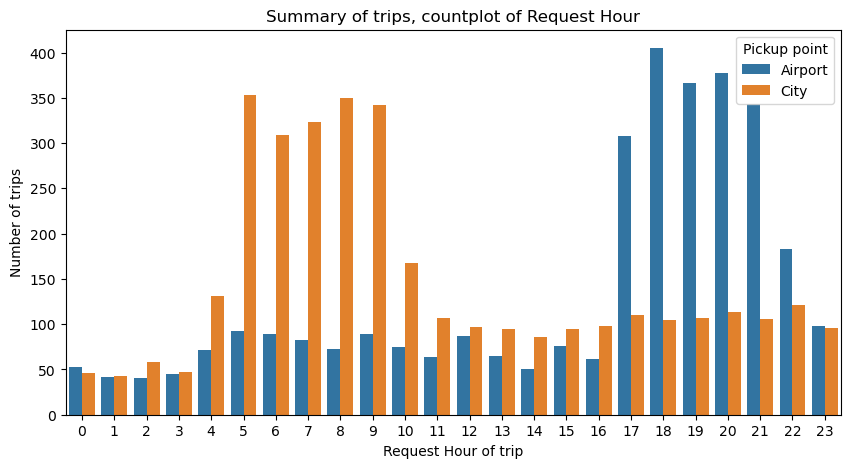

In [30]:
# Chart - 9 visualization code

# Bivariate analysis between 'Pickup point' and 'Status'
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_uber, x='Request hour', hue='Pickup point')
plt.title("Summary of trips, countplot of Request Hour")
plt.xlabel("Request Hour of trip")
plt.ylabel("Number of trips")
plt.legend(title='Pickup point')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

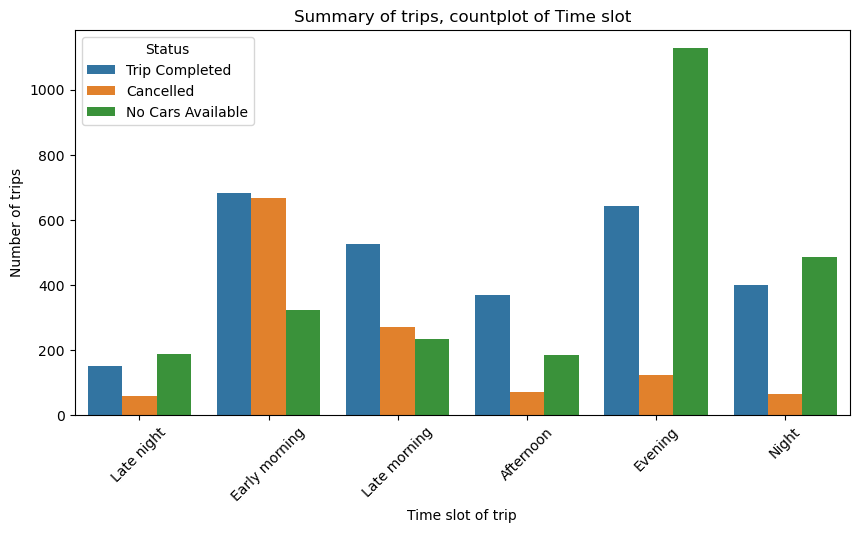

In [31]:
# Chart - 10 visualization code

# Bivariate analysis between 'Time slot' and 'Status'
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_uber, x='Request hour timeslot', hue='Status',)
plt.title("Summary of trips, countplot of Time slot")
plt.xlabel("Time slot of trip")
plt.ylabel("Number of trips")
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

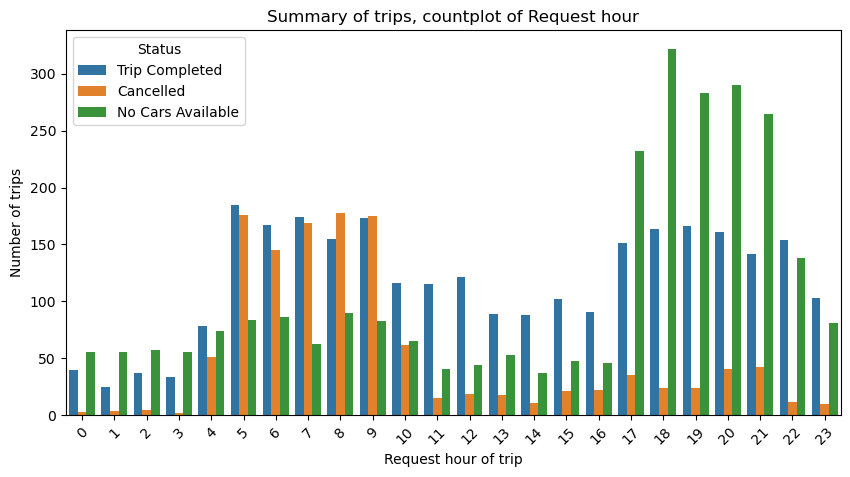

In [32]:
# Chart - 11 visualization code

# Bivariate analysis between 'Request hour' and 'Status'
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_uber, x='Request hour', hue='Status',)
plt.title("Summary of trips, countplot of Request hour")
plt.xlabel("Request hour of trip")
plt.ylabel("Number of trips")
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

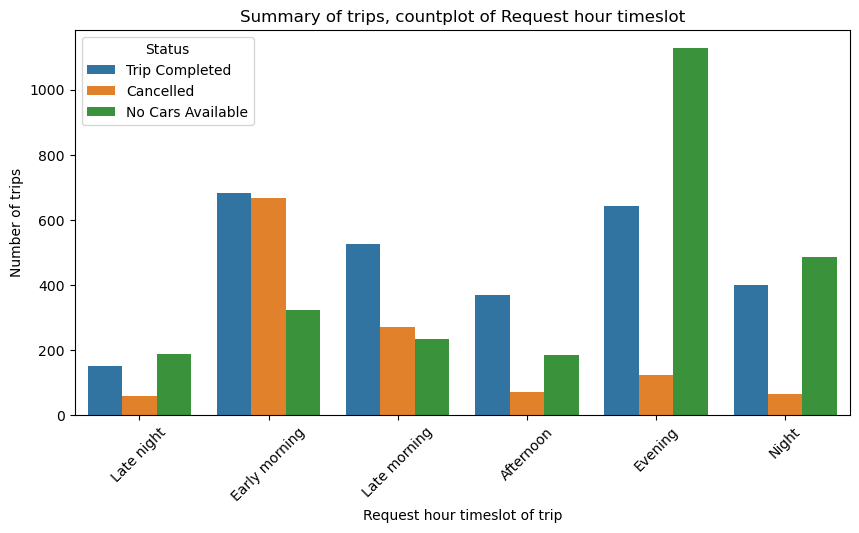

In [33]:
# Chart - 12 visualization code

# Bivariate analysis between 'Request hour timeslot' and 'Status'
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_uber, x='Request hour timeslot', hue='Status',)
plt.title("Summary of trips, countplot of Request hour timeslot")
plt.xlabel("Request hour timeslot of trip")
plt.ylabel("Number of trips")
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Multivariate Analysis

#### Chart - 13

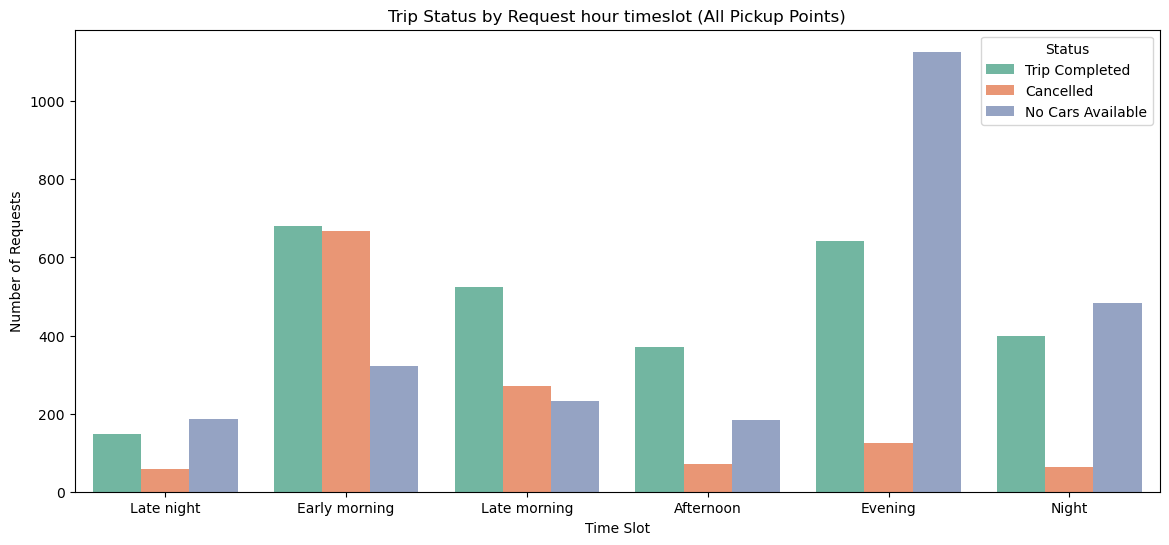

In [34]:
# Chart - 13 visualization code

plt.figure(figsize=(14, 6))
sns.countplot(data=df_uber, x='Request hour timeslot', hue='Status', palette='Set2',)
plt.title('Trip Status by Request hour timeslot (All Pickup Points)')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

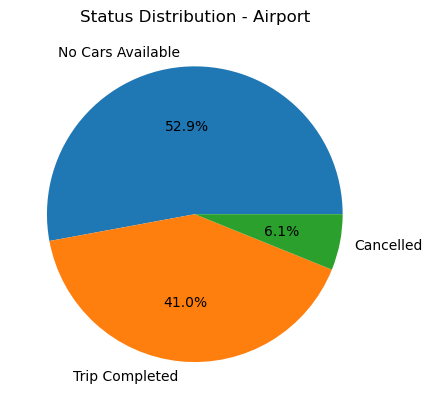

In [35]:
status_airport = df_uber[df_uber['Pickup point'] == 'Airport']['Status'].value_counts()
plt.pie(status_airport, labels=status_airport.index, autopct='%1.1f%%')
plt.title('Status Distribution - Airport')
plt.show()


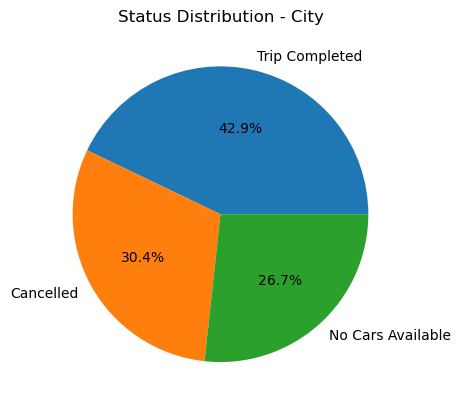

In [36]:
# Correlation Heatmap visualization code

status_city = df_uber[df_uber['Pickup point'] == 'City']['Status'].value_counts()
plt.pie(status_city, labels=status_city.index, autopct='%1.1f%%')
plt.title('Status Distribution - City')
plt.show()


Answer Here

#### Chart - 14 - Correlation Heatmap

In [37]:
df_encoded = df_uber.copy()

df_encoded['Pickup point'] = df_encoded['Pickup point'].map({'City': 0, 'Airport': 1})
df_encoded['Status'] = df_encoded['Status'].map({'Trip Completed': 1, 'Cancelled': 2, 'No Cars Available': 3})

# Include only relevant numeric columns
df_corr = df_encoded[['Pickup point', 'Driver id', 'Status', 'Request hour']]

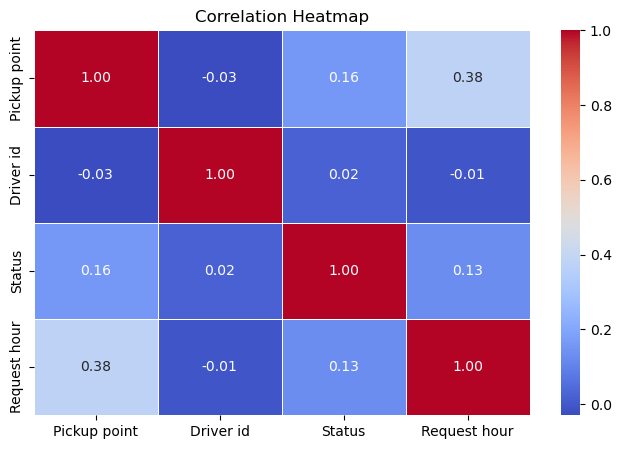

In [38]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

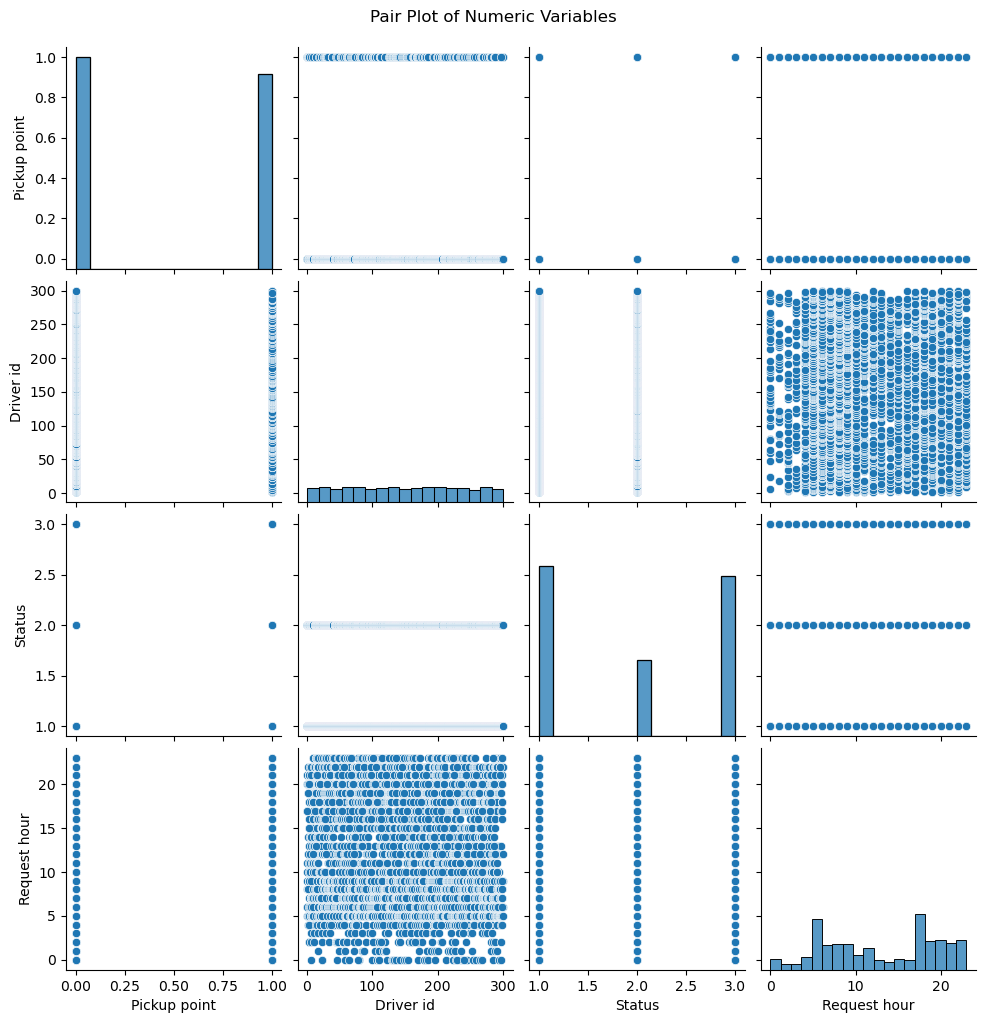

In [39]:
sns.pairplot(df_corr)
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [40]:
airport = df_uber[df_uber["Pickup point"] == "Airport"]
city = df_uber[df_uber["Pickup point"] == "City"]

In [41]:
temp = pd.DataFrame(city['Status'].value_counts())
temp = temp.rename(columns = {'Status' : 'City'})
temp['Airport'] = airport.Status.value_counts()
temp_city_total = temp.City.sum()
temp_airport_total = temp.Airport.sum()
temp['City_percent'] = round(temp.City/temp_city_total*100, 2)
temp['Airport_percent']= round(temp.Airport/temp_airport_total*100,2)
temp

,City,Airport,City_percent,Airport_percent
Trip Completed,1504,1327,42.89,40.98
Cancelled,1066,198,30.40,6.11
No Cars Available,937,1713,26.72,52.90


In [42]:
city_demand_supply = pd.DataFrame(city['Request hour timeslot'].value_counts())
city_demand_supply = city_demand_supply.rename(columns = {'Request hour timeslot' : 'Demand'})

trips_completed = city[city['Status'] == 'Trip Completed']
city_demand_supply['Supply'] = pd.DataFrame(trips_completed.groupby('Request hour timeslot')['Status'].count())

city_demand_supply['Gap'] = city_demand_supply['Demand'] -city_demand_supply['Supply']
city_demand_supply

,Demand,Supply,Gap
Early morning,1335,373,962
Late morning,714,286,428
Evening,436,330,106
Afternoon,374,208,166
Night,323,196,127
Late night,236,82,154


Text(0.5, 1.0, 'Supply-Demand Gap in the City')

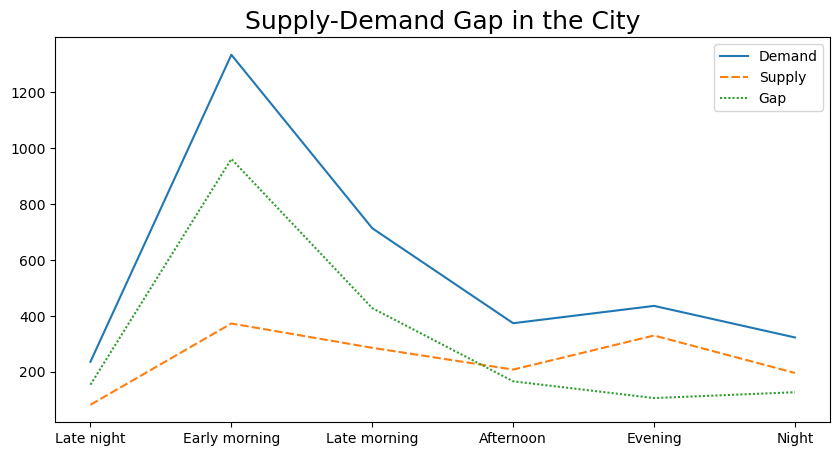

In [43]:
plt.figure(figsize=(10,5))
sns.lineplot(data=city_demand_supply)
plt.title("Supply-Demand Gap in the City", fontsize = 18)

In [44]:
# Overall demand through the day at different hours at the city

city_demand_supply = pd.DataFrame(city['Request hour'].value_counts())
city_demand_supply = city_demand_supply.rename(columns = {'Request hour' : 'Demand'})

trips_completed = city[city['Status'] == 'Trip Completed']
city_demand_supply['Supply'] = pd.DataFrame(trips_completed.groupby('Request hour')['Status'].count())

city_demand_supply['Gap'] = city_demand_supply['Demand'] -city_demand_supply['Supply']
city_demand_supply.head(10)

,Demand,Supply,Gap
5,353,100,253
8,350,88,262
9,342,99,243
7,323,99,224
6,309,86,223
10,168,63,105
4,131,42,89
22,121,74,47
20,114,87,27
17,110,77,33


Text(0.5, 1.0, 'Supply-Demand Gap in the City')

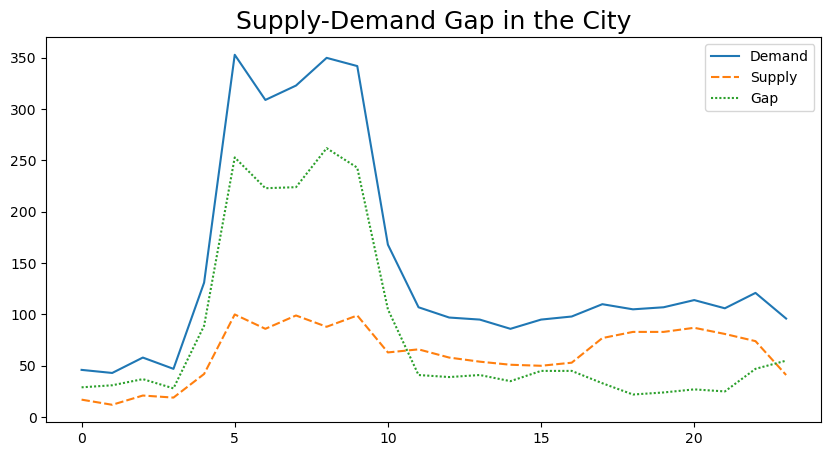

In [45]:
plt.figure(figsize=(10,5))
sns.lineplot(data=city_demand_supply)
plt.title("Supply-Demand Gap in the City", fontsize = 18)

In [46]:
# Overall demand through the day at different timeslots at the airport

airport_demand_supply = pd.DataFrame(airport['Request hour timeslot'].value_counts())
airport_demand_supply = airport_demand_supply.rename(columns = {'Request hour timeslot' : 'Demand'})

trips_completed = airport[airport['Status'] == 'Trip Completed']
airport_demand_supply['Supply'] = pd.DataFrame(trips_completed.groupby('Request hour timeslot')['Status'].count())

airport_demand_supply['Gap'] = airport_demand_supply['Demand'] -airport_demand_supply['Supply']
airport_demand_supply

,Demand,Supply,Gap
Evening,1457,312,1145
Night,624,203,421
Early morning,337,308,29
Late morning,315,239,76
Afternoon,252,162,90
Late night,158,67,91


Text(0.5, 1.0, 'Supply-Demand Gap at the Airport')

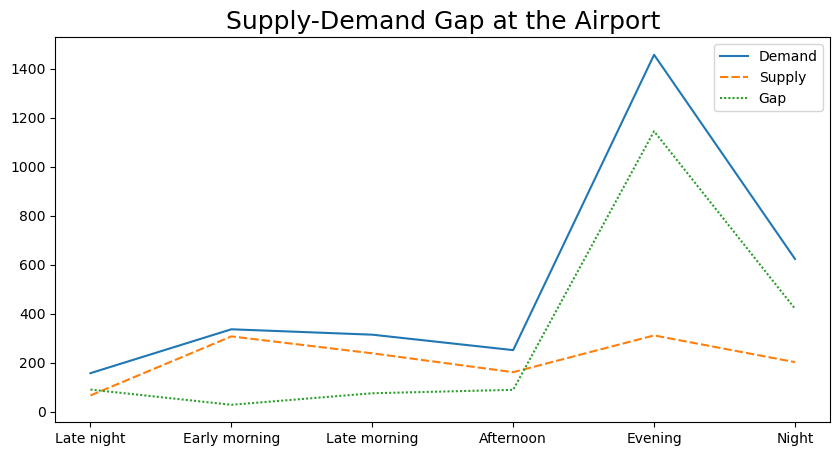

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(data=airport_demand_supply)
plt.title("Supply-Demand Gap at the Airport", fontsize = 18)

In [48]:
# Overall demand through the day at different hours at the airport

airport_demand_supply = pd.DataFrame(airport['Request hour'].value_counts())
airport_demand_supply = airport_demand_supply.rename(columns = {'Request hour' : 'Demand'})

trips_completed = airport[airport['Status'] == 'Trip Completed']
airport_demand_supply['Supply'] = pd.DataFrame(trips_completed.groupby('Request hour')['Status'].count())

airport_demand_supply['Gap'] = airport_demand_supply['Demand'] -airport_demand_supply['Supply']
airport_demand_supply.head(10)

,Demand,Supply,Gap
18,405,81,324
20,378,74,304
19,366,83,283
21,343,61,282
17,308,74,234
22,183,80,103
23,98,62,36
5,92,85,7
6,89,81,8
9,89,74,15


Text(0.5, 1.0, 'Supply-Demand Gap at the Airport')

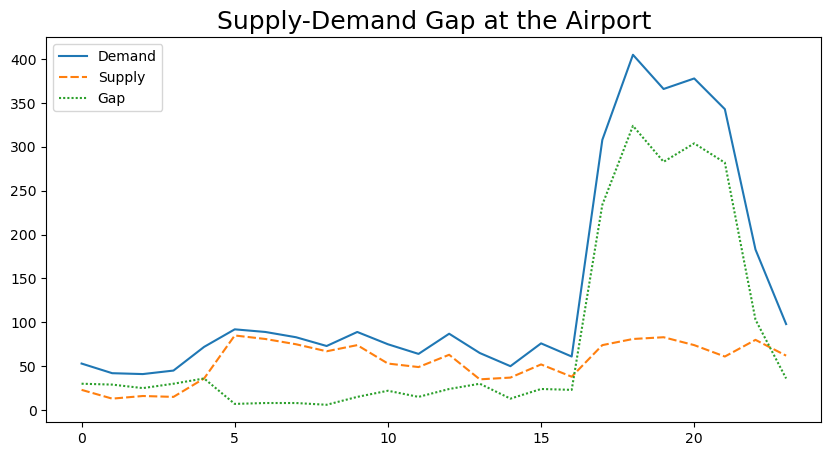

In [49]:
plt.figure(figsize=(10,5))
sns.lineplot(data=airport_demand_supply)
plt.title("Supply-Demand Gap at the Airport", fontsize = 18)

In [50]:
# Demand supply and gap at the airport

airport_demand_supply.apply(lambda x: x.sum())

Demand    3238
Supply    1327
Gap       1911
dtype: int64

In [51]:
# Demand supply and gap at the city

city_demand_supply.apply(lambda x: x.sum())

Demand    3507
Supply    1504
Gap       2003
dtype: int64

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

To address the business objective of analyzing the supply-demand gap in Uber rides, a detailed assessment reveals that peak demand occurs during morning hours in the city and evening hours at the airport, where a significant number of trip requests go unmet due to driver unavailability. The high incidence of "No Cars Available" and "Cancelled" statuses during these periods indicates a clear mismatch between rider demand and driver supply. To mitigate this, Uber can implement dynamic driver incentives during peak hours, adjust driver shift patterns to align with demand surges, and leverage predictive models to forecast demand more accurately. These measures would help balance supply, reduce missed trip opportunities, and ultimately improve customer satisfaction and operational efficiency.

# **Conclusion**

Through in-depth EDA, the project identifies when and where Uber loses business opportunities. By analyzing the status distribution across time and location, this project offers practical, data-driven recommendations to address the Uber demand-supply mismatch problem. Implementing these strategies can significantly reduce unmet ride requests, improve customer experience, and maximize operational efficiency.